# PCA analysis

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
#PCA is used to reduce unwanted dimensions of a dataset. It captures only, what is required of a dataset like PC1 captures 76.86 & PC1+PC2 captures 89.98 variance of data
wine = pd.read_csv("wine.csv")
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
# Considering only numerical data 
wine_witOutType = wine.iloc[:,1:]
wine_witOutType.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# Converting into numpy array
wine_witOutType_arr = wine_witOutType.values
wine_witOutType_arr

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
# Standardizing the numerical data 
wine_witOutType_arr_stn = scale(wine_witOutType_arr)
wine_witOutType_arr_stn

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
pca = PCA()
pca_values_witOutType = pca.fit_transform(wine_witOutType_arr)
pca_values_witOutType

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [17]:
# The amount of variance that each PCA explains is 
var_witOutTyp = pca.explained_variance_ratio_
var_witOutTyp

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [18]:
# Cumulative variance 
var1_witOutTyp = np.cumsum(np.round(var_witOutTyp,decimals = 4)*100)
var1_witOutTyp

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

In [19]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

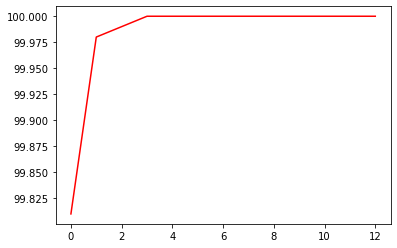

In [20]:
# Variance plot for PCA components obtained 
plt.plot(var1_witOutTyp,color="red")

In [22]:
final_wine_Df = pd.concat([pd.DataFrame(pca_values_witOutType[:,0:3],columns=['pc1','pc2','pc3']), wine[['Type']]], axis = 1)
final_wine_Df

,pc1,pc2,pc3,Type
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,1
...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,3
174,3.131605,2.335191,-4.309931,3
175,88.458074,18.776285,-2.237577,3
176,93.456242,18.670819,-1.788392,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

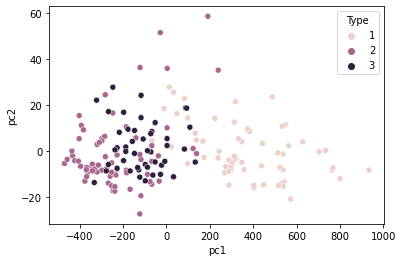

In [24]:
import seaborn as sns
sns.scatterplot(data=final_wine_Df,x='pc1',y='pc2',hue='Type')

In [25]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Hierarchical clustering with original data and PCA converted data

In [26]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [27]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [28]:
# Normalized data frame (considering the numerical part of data). Convert all data between 0 to 1 range to make it units free
wine_ori_norm = norm_func(wine.iloc[:,1:])
wine_ori_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


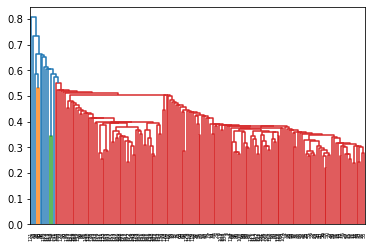

In [29]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(wine_ori_norm, method='single'))

In [30]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'single')

In [32]:
# save clusters for chart
y_orig_hc = hc.fit_predict(wine_ori_norm)
y_orig_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [33]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [44]:
wine_hier_original = pd.read_csv("wine.csv")
wine_hier_original['h_clusterid'] = y_orig_hc
wine_hier_original

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [ ]:
#Above is clustering with normal data

In [34]:
#Clustering with PCA data 
final_wine_Df

,pc1,pc2,pc3,Type
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,1
...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,3
174,3.131605,2.335191,-4.309931,3
175,88.458074,18.776285,-2.237577,3
176,93.456242,18.670819,-1.788392,3


In [42]:
# Normalized data frame (considering the numerical part of data). Convert all data between 0 to 1 range to make it units free
wine_PCA_hier = norm_func(final_wine_Df.iloc[:,:-1])
wine_PCA_hier

,pc1,pc2,pc3
0,0.561714,0.567757,0.640338
1,0.550684,0.256546,0.835149
2,0.646937,0.242958,0.416408
3,0.857452,0.320944,0.426748
4,0.326270,0.532969,0.445893
...,...,...,...
173,0.329544,0.266089,0.344570
174,0.336755,0.345770,0.247736
175,0.397608,0.536286,0.357082
176,0.401173,0.535064,0.380783


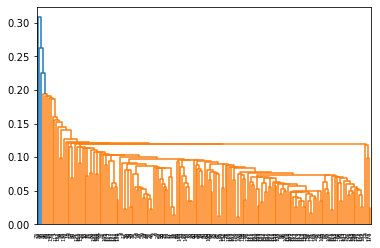

In [43]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(wine_PCA_hier, method='single'))

In [ ]:
#Got diff dendograms with original data and PCA data

In [45]:
# create clusters
hc = AgglomerativeClustering(n_clusters=15, affinity = 'euclidean', linkage = 'single')

In [46]:
# save clusters for chart
y_hc = hc.fit_predict(wine_PCA_hier)
y_hc

array([ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  4,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 13,  0,  0,  0,  8,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [47]:
hc.labels_

array([ 0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  4,
        0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 13,  0,  0,  0,  8,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 12,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,
        0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [48]:
wine_hier_PCA = pd.read_csv("wine.csv")
wine_hier_PCA['h_clusterid'] = y_hc
wine_hier_PCA

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,10
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


# K-Mean clustering with original data and PCA converted data

In [49]:
from sklearn.cluster import KMeans

In [51]:
# Standardization function  - Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_KMean_origi_arr = scaler.fit_transform(wine.iloc[:,1:]) #Consider all rows & columns, except for 1st column
wine_KMean_origi_arr

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

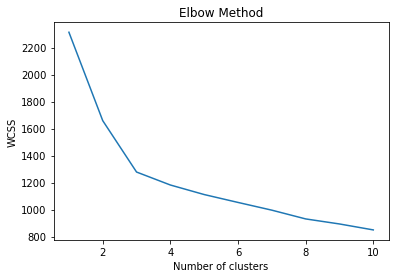

In [52]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_KMean_origi_arr)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
#Build Cluster algorithm
clusters_new = KMeans(9, random_state=0)
clusters_new.fit(wine_KMean_origi_arr)
#Bear in mind that the KMeans function is stochastic (the results may vary even if you run the function with the same inputs' values). Hence, in order to make the results reproducible, you can specify a value for the random_state parameter.

KMeans(n_clusters=9, random_state=0)

In [54]:
clusters_new.labels_

array([8, 1, 8, 8, 3, 8, 1, 1, 8, 8, 8, 1, 1, 8, 8, 3, 3, 3, 8, 1, 8, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 3, 8, 1, 3, 1, 1, 1, 1, 1, 8, 8, 1, 8, 1,
       1, 1, 8, 8, 8, 8, 8, 1, 8, 3, 1, 8, 8, 1, 8, 4, 0, 4, 4, 7, 0, 7,
       7, 4, 0, 6, 0, 3, 0, 3, 7, 4, 4, 0, 6, 7, 4, 7, 0, 5, 7, 4, 0, 0,
       0, 0, 0, 0, 0, 7, 7, 6, 6, 4, 7, 7, 4, 4, 7, 4, 4, 0, 4, 0, 7, 7,
       7, 7, 0, 0, 0, 0, 4, 0, 5, 7, 7, 3, 0, 7, 7, 7, 7, 0, 0, 0, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 5, 2, 2, 5, 5, 5, 5, 2, 5, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2,
       2, 2])

In [55]:
wine_KMean_origi = pd.read_csv("wine.csv")
wine_KMean_origi['KMean_clusterid'] = clusters_new.labels_
wine_KMean_origi

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMean_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,8
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,8
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,8
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,5
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [56]:
final_wine_Df

,pc1,pc2,pc3,Type
0,318.562979,21.492131,3.130735,1
1,303.097420,-5.364718,6.822835,1
2,438.061133,-6.537309,-1.113223,1
3,733.240139,0.192729,-0.917257,1
4,-11.571428,18.489995,-0.554422,1
...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,3
174,3.131605,2.335191,-4.309931,3
175,88.458074,18.776285,-2.237577,3
176,93.456242,18.670819,-1.788392,3


In [57]:
scaler = StandardScaler()
wine_KMean_PCA_arr = scaler.fit_transform(final_wine_Df.iloc[:,:-1]) #Consider all rows & columns, except for 1st column
wine_KMean_PCA_arr

array([[ 1.01428247e+00,  1.64083119e+00,  1.02194385e+00],
       [ 9.65041198e-01, -4.09572983e-01,  2.22713050e+00],
       [ 1.39475632e+00, -4.99095290e-01, -3.63381597e-01],
       [ 2.33458583e+00,  1.47140277e-02, -2.99413796e-01],
       [-3.68426271e-02,  1.41163108e+00, -1.80976123e-01],
       [ 2.23903942e+00, -2.53588776e-02,  3.09897954e-01],
       [ 1.72878392e+00, -1.03211461e+00,  6.94283081e-01],
       [ 1.74607355e+00,  8.74114622e-01,  1.32176577e-02],
       [ 9.48928735e-01, -6.24519656e-01,  1.26683960e+00],
       [ 9.48969140e-01, -5.42172076e-01,  5.08715679e-01],
       [ 2.42959297e+00, -6.36289059e-01, -6.15728582e-01],
       [ 1.69685434e+00, -1.09079902e+00,  4.25444212e-02],
       [ 1.82386510e+00, -1.60364196e+00,  1.21630064e-01],
       [ 1.28288644e+00, -1.22936652e+00,  1.85249624e+00],
       [ 2.54731461e+00, -9.25191008e-01,  9.94457463e-01],
       [ 1.79333492e+00,  1.69092585e-01, -1.71538877e-01],
       [ 1.69824388e+00,  8.24899899e-01

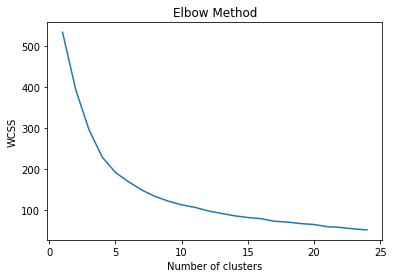

In [59]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_KMean_PCA_arr)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(17, random_state=0)
clusters_new.fit(wine_KMean_PCA_arr)
#Bear in mind that the KMeans function is stochastic (the results may vary even if you run the function with the same inputs' values). Hence, in order to make the results reproducible, you can specify a value for the random_state parameter.

KMeans(n_clusters=17, random_state=0)

In [61]:
clusters_new.labels_

array([ 3,  6, 13,  9, 16,  0, 13,  0,  6,  6,  9, 13, 13,  6, 13,  0,  0,
        0,  9,  3,  8,  5,  6, 13, 10,  4, 13, 13,  5,  6,  9,  9,  6,  0,
        0, 10,  3, 13,  6,  8,  3, 13,  6,  5,  3,  0,  6,  6,  0,  0,  6,
       13,  6,  0,  3,  0,  3, 13,  0, 12, 11, 11,  5,  1, 11,  5, 12,  1,
        3,  7, 10, 15, 15, 14, 10, 11, 12, 11,  8, 16, 12,  1, 15, 15, 11,
       11, 15,  2, 15, 15,  1,  1,  1, 12, 11,  7,  8, 12,  1, 12,  5,  1,
        5,  1,  1,  1,  1, 15, 11,  5, 11,  1,  5,  1,  1,  1,  1, 16, 12,
        1,  5,  4,  2,  1,  1,  1,  1,  2, 15, 15,  8, 16,  2, 16,  1,  5,
       10,  2,  1,  2,  5, 10,  2,  1, 16, 10,  1, 15, 10, 16,  4,  4,  4,
        5, 16, 10,  1,  2,  2,  2, 15, 16, 16,  5, 15, 15,  4, 10,  2,  4,
        5,  1, 10, 10,  2, 16, 16,  2])

In [62]:
wine_KMean_PCA = pd.read_csv("wine.csv")
wine_KMean_PCA['KMean_PCA_clusterid'] = clusters_new.labels_
wine_KMean_PCA

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMean_PCA_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,6
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,13
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,9
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,10
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,16
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,16
